### Introduction

In this report, I am going to investigate the Titanic dataset, do some data overview, and then explore what are the key factors that determine suvival from that catastrophe. This dataset contains detailed information for a portion of all the passengers on Titanic's last voyage.

### Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline  
matplotlib.style.use('ggplot')

In [2]:
data = pd.read_csv("titanic_data.csv")

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


- There are 891 passengers (rows) in total.
- Variables are PassengerID (integer), Survived (integer/dummy), Name (string), Sex (string), Age (float), SibSp (integer), Parch (integer),Ticket (string), Fare (float), Cabin (String), Embarked (String)
- Variables Age, Cabin and Embarked have missing values.
- The overall survival rate is 0.38.

###Univariate Analysis

How many passengers are survived, how many are dead?

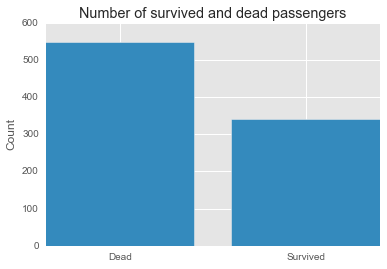

In [6]:
# Draw bar plot of variable 'Survived'

survival = data['Survived']
survival.unique()

x = [0,1]
y = [survival[survival==0].count(),survival[survival==1].count()]
labels = ['Dead','Survived']
plt.bar(x, y, align='center')
plt.xticks(x,labels)
plt.ylabel('Count')
plt.title('Number of survived and dead passengers')

In [7]:
# Describe the number of survived and dead.

total = data['Survived']
survived = data[data['Survived']==1]
dead = data[data['Survived']==0]
print len(total)
print len(survived)
print len(dead)

891
342
549


- There are 891 passenger in total, 342 are survived, which corresponds to 0.38 survival rate.

How many passengers are in each passenger class?

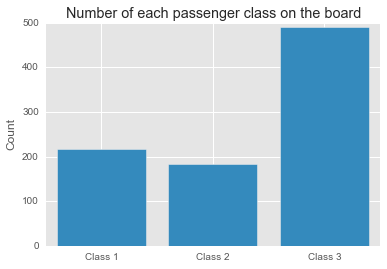

In [8]:
# Draw a bar plot of Pclass

pclass = data['Pclass']
pclass.unique()

x = [1,2,3]
y = [pclass[pclass==1].count(), pclass[pclass==2].count(), pclass[pclass==3].count()]
labels = ['Class 1', 'Class 2', 'Class 3']
plt.bar(x, y, align='center')
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Number of each passenger class on the board')

In [9]:
pd.crosstab(index = data["Pclass"],columns = 'count')

col_0,count
Pclass,
1,216
2,184
3,491


- No missing values
- Class order: 1>2>3
- Class 3 has most passengers

How many males and females are on the board?

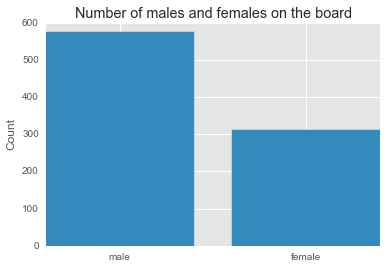

In [10]:
# Draw a bar plot of sex
sex = data['Sex']
sex.unique()

x = [0, 1]
y = [sex[sex=='male'].count(), sex[sex=='female'].count()]
labels = ['male', 'female']
plt.bar(x, y, align='center')
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Number of males and females on the board')

In [11]:
pd.crosstab(index = data['Sex'], columns = 'count')

col_0,count
Sex,
female,314
male,577


What is the distribution of age?

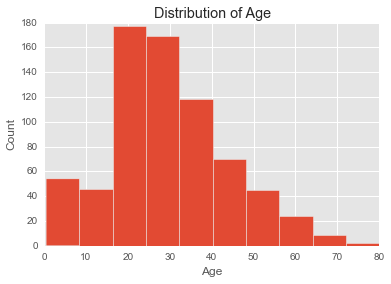

In [12]:
# Draw a hisgram plot for age
age = data['Age']
age = age.dropna()
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

In [13]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- There are 177 missing values, and I drop all of them in the analysis.
- The majority of passengers are in their 20s to 40s.
- There are considerable number of passengers are under 18 years old. I am very curious about their survival.

### Bivariate Analysis

How does passenger class affect survival ?

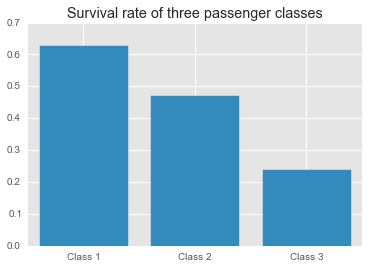

In [14]:
# Draw a barplot showing survival rate of each class.

survival_pclass = data.groupby('Pclass')['Survived'].mean()
x = [1,2,3]
y = [survival_pclass[1],survival_pclass[2],survival_pclass[3]]
labels = ['Class 1', 'Class 2', 'Class 3']
plt.bar(x, y, align='center')
plt.xticks(x, labels)
#plt.ylabel('survival rate')
plt.title('Survival rate of three passenger classes')

- These results goes along with intuition:
    - Higher class are filled with richer people.
    - richer people have bigger chance to survive maybe because they have better access to information and easier access to the lifeboats.

How does fare affect survival?

Survived      
0         mean    22.117887
          std     31.388207
1         mean    48.395408
          std     66.596998
dtype: float64

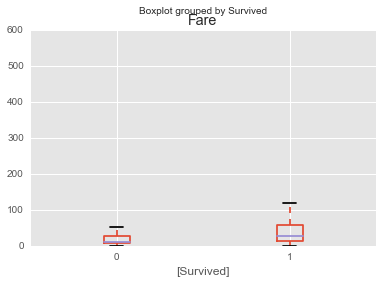

In [15]:
# Draw a boxplot to show the relationship between fare and survival.
data.boxplot(column = ['Fare'], by = ['Survived'])
data.groupby(['Survived'])['Fare'].describe().loc[:, ['mean','std']]

Pclass      
1       mean    84.154687
        std     78.380373
2       mean    20.662183
        std     13.417399
3       mean    13.675550
        std     11.778142
dtype: float64

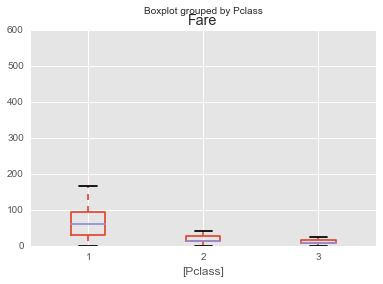

In [16]:
# Draw a boxplot to show the relationship between fare and passenger class.
data.boxplot(column = ['Fare'], by = ['Pclass'])
data.groupby(['Pclass'])['Fare'].describe().loc[:, ['mean','std']]

- The result is intuitive:
    - Higher passenger class are associated with higher fares.
    - People with higher fares are generally richer.
    - Richer people have higher survival rate.

How does sex affect survival ?

In [17]:
male = data[data['Sex']=='male']
female = data[data['Sex']=='female']
male_survived = male[male['Survived']==1]
male_dead = male[male['Survived']==0]
female_survived = female[female['Survived']==1]
female_dead = female[female['Survived']==0]

print len(male), len(male_survived)
print len(female), len(female_survived)
print round(float(len(male_survived)) / len(male), 2)
print round(float(len(female_survived)) / len(female), 2)

577 109
314 233
0.19
0.74


- There are  577  males in total, 109  of them are survived, survival rate is 0.19.
- There are  314  females in total, 233 of them are survived, survival rate is 0.74.
- This result is more or less intuitive. Males tend to protect females and children first in this kind of emergency.

How does age affect survival ?

Survived      
0         mean    30.626179
          std     14.172110
1         mean    28.343690
          std     14.950952
dtype: float64

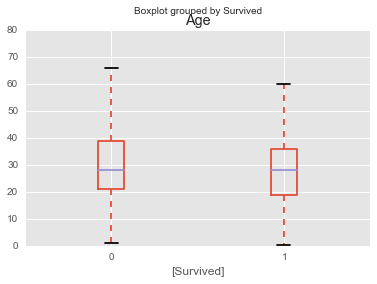

In [18]:
# Draw a boxplot to show the relationship between survival and age.
data.boxplot(column = ['Age'], by = ['Survived'])
data.groupby(['Survived'])['Age'].describe().loc[:, ['mean','std']]

count    113.000000
mean       9.041327
std        6.030408
min        0.420000
25%        3.000000
50%        9.000000
75%       16.000000
max       17.000000
Name: Age, dtype: float64

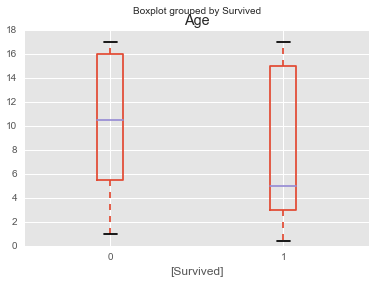

In [19]:
# Draw a boxplot of passengers under 18 and survival.
under_eighteen = data[data['Age'] < 18]
under_eighteen.boxplot(column = ['Age'], by = ['Survived'])
under_eighteen['Age'].describe()

In [20]:
under_eighteen[under_eighteen['Survived'] == 1].shape

(61, 12)

- All missing values are dropped when analyzing age data.
- The result is surpiring for me:
    - There was infant who was not survived (less than 1 year old)
    - For middle 50 percentile, passengers dead are generally older than passengers survived.
    - Among all 113 passengers under 18 years old, only 61 are survived.

### Multivariate Analysis

What are survival rates for both male and female passengers in different passenger classes?

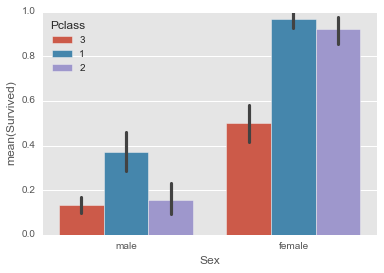

In [20]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data = data)

- Survival rate order by mean: Class 1 Female > Class 2 Female > Class 3 Female > Class 1 Male > Class 2 Male > Class 3 male.
- Female in Class 1 are most favored, almost all of them could survive.
- Males in Class 3  are miserable, only about 1 out of 10 could survive.

### Limitations

- There are a total of 2222 passengers on Titanic's last voyage, but we have only 891 individuals in this dataset. So our conclusions made above are at most sample estimates about population parameters.
- We have a portion of data are missing values. I treated them by dropping them from the analysis. This definitely ease my tension for having NA values, but this also make my result less accurate.